In [20]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [22]:
# Importing the Excel file
df = pd.read_excel("merged_output_with_recharge_aridity_V7.xlsx")


In [23]:
# Remove NaN values in "Method" column
df = df.dropna(subset=["Method"])  


Unique Methods after cleaning: ["Darcy's Law" 'Tritium' 'Cl SS Soil' 'Cl SS GW'
 'SALF MODEL (SHAW AND THORBURN 1985)' 'C14' 'WTF' 'Lysimeter'
 'Cl Transient Soil' 'WB' 'Cl36' 'CFC' 'Baseflow']


/var/folders/79/63bnf85s5bqggmz2_tltf7_m0000gn/T/ipykernel_32483/2543352644.py:27: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x="Aridity", y="Recharge fraction", hue="Method", style="Method", markers=True, alpha=0.5, palette=custom_palette, edgecolor=None)


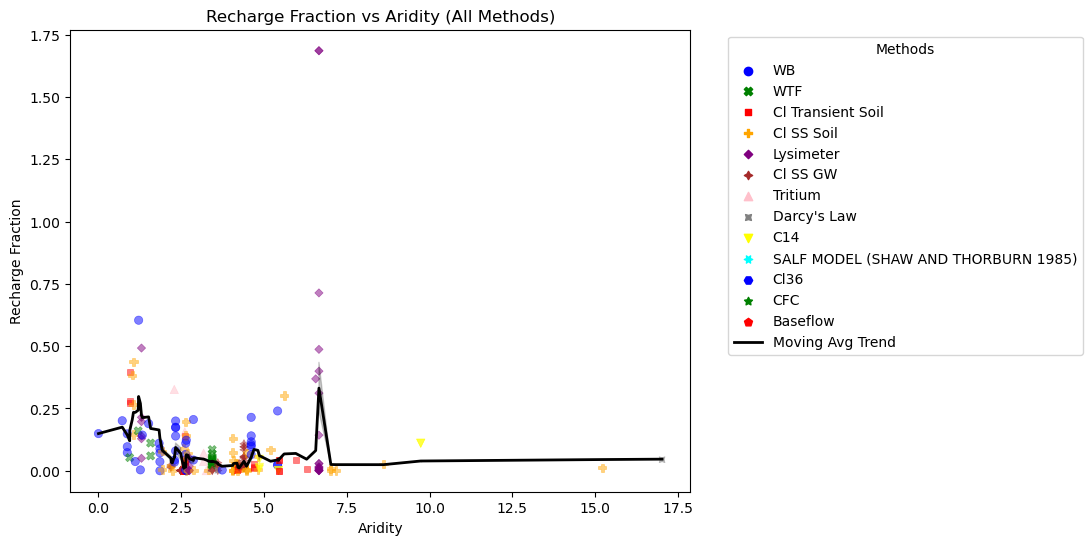

In [26]:
# Standardize 'Method' column (remove spaces, fix inconsistencies)
df["Method"] = df["Method"].astype(str).str.strip()  # Remove leading & trailing spaces

# Fix known variations
df["Method"] = df["Method"].replace({
    "salf model (shaw & thorburn 1985)": "salf model (shaw and thorburn 1985)",
    "salf model  (shaw and thorburn 1985)": "salf model (shaw and thorburn 1985)",  # Extra space fix
    " Cl SS Soil": "Cl SS Soil"  # Remove leading space
})

# Check unique values after cleaning
print("Unique Methods after cleaning:", df["Method"].unique())


# Define moving average window size
window_size = 10  
df["Moving_Avg"] = df["Recharge fraction"].rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(8, 6))

# Define a custom color palette
custom_palette = sns.color_palette(["blue", "green", "red", "orange", "purple", "brown", "pink", "gray", "yellow", "cyan"])

# Scatter plot for all techniques with enhanced data point contrast in colors
sns.scatterplot(data=df, x="Aridity", y="Recharge fraction", hue="Method", style="Method", markers=True, alpha=0.5, palette=custom_palette, edgecolor=None)

# Moving average trend line
sns.lineplot(data=df, x="Aridity", y="Moving_Avg", color="black", linewidth=2, label="Moving Avg Trend")

plt.xlabel("Aridity")
plt.ylabel("Recharge Fraction")
plt.title("Recharge Fraction vs Aridity (All Methods)")

# Fix duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

# Compare two commonly used method

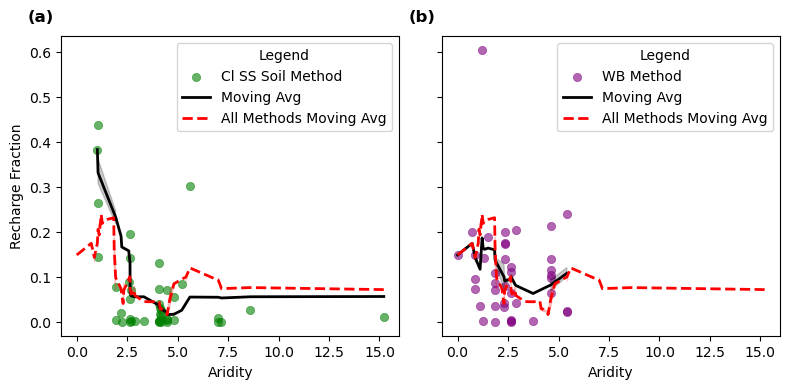

In [27]:

# Filter dataframe for "Cl SS Soil" and "WB" methods
methods = ["Cl SS Soil", "WB"]
df_filtered = df[df["Method"].isin(methods)]

# Sort data by Aridity
df_filtered = df_filtered.sort_values(by="Aridity")

# Define moving average window size
window_size = 10

# Compute moving average separately for each method
df_filtered["Moving_Avg_Method"] = df_filtered.groupby("Method")["Recharge fraction"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Compute moving average for all methods together
df_filtered["Moving_Avg_All"] = df_filtered["Recharge fraction"].rolling(window=window_size, min_periods=1).mean()



# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Define a custom color palette for the methods
custom_palette = {"Cl SS Soil": "green", "WB": "purple"}

# Add subplot labels
subplot_labels = ['(a)', '(b)']

# Plot for each method
for ax, method, label in zip(axes, methods, subplot_labels):
    method_df = df_filtered[df_filtered["Method"] == method]

    # Scatter plot
    sns.scatterplot(data=method_df, x="Aridity", y="Recharge fraction", color=custom_palette[method], alpha=0.6, edgecolor=None, ax=ax, label=f"{method} Method")
    
    # Moving average for individual method (Black Line)
    sns.lineplot(data=method_df, x="Aridity", y="Moving_Avg_Method", color="black", linewidth=2, ax=ax, label="Moving Avg")
    
    # Moving average for all methods combined (Red Line)
    sns.lineplot(data=df_filtered, x="Aridity", y="Moving_Avg_All", color="red", linestyle="dashed", linewidth=2, ax=ax, label="All Methods Moving Avg")

    ax.set_xlabel("Aridity")
    ax.set_ylabel("Recharge Fraction")
    ax.legend(title="Legend")

    # Add subplot label
    ax.text(-0.1, 1.05, label, transform=ax.transAxes, fontsize=12, fontweight='bold')

# Layout adjustment
plt.tight_layout()

# Save the figure before displaying it
#plt.savefig("subplot_cl_ss_soil_wb_methods_moving_avg_comparison.png", dpi=300, bbox_inches='tight')

# Display the figure
plt.show()
